# Cross Section Data

Experimentally the Rosenbluth technique is a straight forward way to extract the electric and magnetic form factors of the nucleon though limits the amount of data that can be used.

For data below 1 GeV/c^2, the world data is dominated by the Mainz data, though it is worth
noting that due to floating normalizations, different groups extract slightly different values for the form factors from the same cross section data.


## Formulas 

Now using the asymmetry result, it is possible to turn the cross section points in form factors (i.e. two equations and two unknowns).

Asymmetry = $\mu G_E / G_M$

Reduced Cross Section = $\frac{1}{\epsilon(1+\tau)}(\epsilon G_E^2 + \tau G_M^2)$

where $\tau = \frac{Q^2}{4 m_p}$


In [79]:
from math import sqrt
import numpy as np

# So we take the rebinned data of Arrington, Hill and Lee but reformat it to four columns:
# tau, epsilon, cross section, uncertainty.

# This is 658 Cross Section Points


PROTON_MASS = 0.938272 
PROTON_MU   = 2.792847 

q2=[]; eps=[]; rcs=[]; ecs=[]

def tau(q2):
    return q2/4/PROTON_MASS**2

def charge(q2,eps,rcs,delta):
    GE2=(rcs*eps*(1+tau(q2)))/(eps+tau(q2)*(PROTON_MU/asymmetry(q2,delta))**2)
    return GE2

def magnetic(q2,GE2,delta):
    GM2=GE2*(PROTON_MU/asymmetry(q2,delta))**2
    return GM2
    
def asymmetry(q2,delta):
    return (1-q2/(8.02*delta)) 

for l in open("test.dat"):
    values=l.split()
    q2.append(float(values[0])/25.7)
    eps.append(float(values[1]))
    rcs.append(float(values[2]))   
    ecs.append(float(values[3]))  

count=0

#print('Event  Q2  GE2')

ge=[]; gm=[]; dge=[]; uge=[]; ugm=[]

for n in range(len(q2)):
    count+=1
    #print("{0:3} {1:0.3f} {2:0.3f} {3:0.3f} ".format \
    #      (count, q2[n], charge(q2[n],eps[n],rcs[n]), charge(q2[n],eps[n],rcs[n]*1.01) ))
    try:
        ge.append(sqrt(charge(q2[n],eps[n],rcs[n],1.0)))
        t=(sqrt(charge(q2[n],eps[n],rcs[n],1.0)))
        uge.append((sqrt(charge(q2[n],eps[n],rcs[n],1.1))-t)+0.002)
        gm.append(sqrt(magnetic(q2[n],t**2,1)))
        y=(sqrt(magnetic(q2[n],t**2,1)))
        x=(charge(q2[n],eps[n],rcs[n],1.0))
        ugm.append((sqrt(magnetic(q2[n],x,1.1))-y)+0.02)
    except:
        print('Problem with event',n+1)
        ge.append(0)
        uge.append(0)
        dge.append(0)

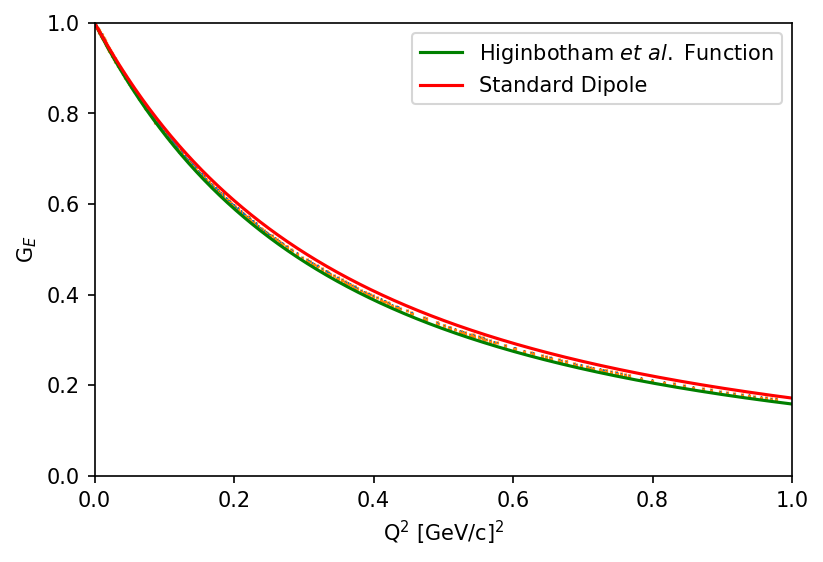

In [80]:
import matplotlib.pyplot as plt

def sd(q2):
    return (1+25.7*0.11/2*q2)**(-2)

def dd(q2):
    return (1+25.7*0.1176/2*q2)**(-2)

rdd=[]
sdd=[]
mdd=[]

mq2=np.linspace(0,1,1000)
for n in mq2:
    rdd.append(dd(n))
    sdd.append(sd(n))
    mdd.append(sd(n)*2.793)

plt.figure(dpi=150)

plt.plot(q2,ge,',')

plt.errorbar(q2,ge,yerr=uge,fmt=',',zorder=1)

plt.plot(mq2,rdd,'r',color='green',label='Higinbotham $\it{et\ al.}$ Function')
plt.plot(mq2,sdd,'-',color='red',label='Standard Dipole')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Q$^2$ [GeV/c]$^2$')
plt.ylabel('G$_E$')
plt.legend()
plt.savefig("./Figures/GeFigure.png") # Raster Graphic
plt.savefig("./Figures/GeFigure.pdf") # Vector Graphic
plt.show()

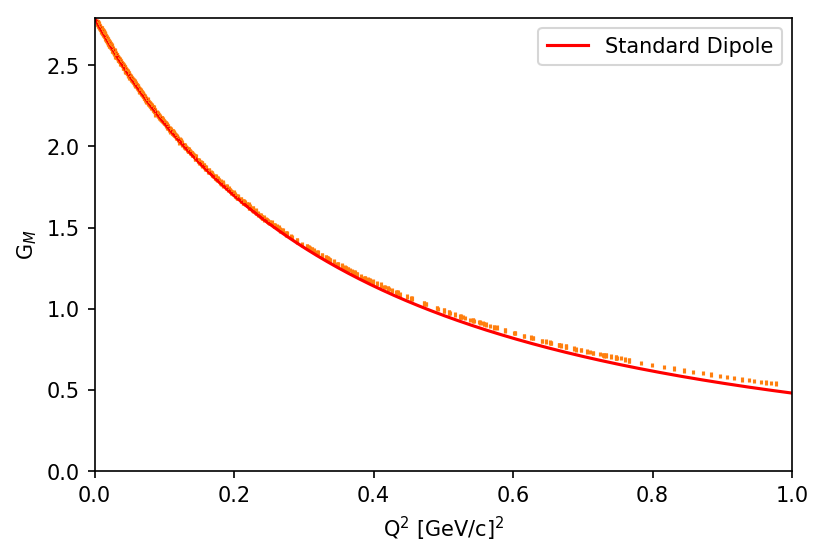

In [81]:
plt.figure(dpi=150)

plt.plot(q2,gm,',')

plt.errorbar(q2,gm,yerr=ugm,fmt=',')

plt.plot(mq2,mdd,'-',color='red',label='Standard Dipole')
plt.xlim(0,1)
plt.ylim(0,PROTON_MU)
plt.xlabel('Q$^2$ [GeV/c]$^2$')
plt.ylabel('G$_M$')
plt.legend()
plt.savefig("./Figures/GmFigure.png") # Raster Graphic
plt.savefig("./Figures/GmFigure.pdf") # Vector Graphic
plt.show()

## References

* https://doi.org/10.1103/PhysRevC.93.055201